In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

def analyze_agents(run_name, base_dir="D:/Tetris-Project/results/gauntlet"):
    run_folder = os.path.join(base_dir, f"run_{run_name}")
    # Accept ANY csv file that starts with "results_"
    file_pattern = os.path.join(run_folder, "results_*.csv")
    agent_files = glob.glob(file_pattern)
    
    agents = {}
    for file_path in agent_files:
        df = pd.read_csv(file_path)
        # Use AgentName if exists, otherwise fallback to filename
        if "AgentName" in df.columns:
            agent_name = df["AgentName"].iloc[0]
        else:
            agent_name = os.path.splitext(os.path.basename(file_path))[0]
        agents[agent_name] = df
    if not agents:
        raise FileNotFoundError(f"No agent result files found in {run_folder} (pattern {file_pattern}).")

    summary = []
    for name, df in agents.items():
        total_games = len(df)
        games_full_survival = (df["TimeSurvived"] >= 600).sum()
        summary.append({
            "Agent": name,
            "MeanScore": df["Score"].mean(),
            "MedianScore": df["Score"].median(),
            "StdScore": df["Score"].std(),
            "MeanTetrises": df["NumTetrises"].mean(),
            "MaxTetrises": df["NumTetrises"].max(),
            "GamesFullSurvival": games_full_survival,
            "SurvivalRate": games_full_survival / total_games if total_games > 0 else 0,
            "GamesUnder20k": (df["Score"] < 20000).sum(),
            "LowestScore": df["Score"].min(),
            "HighestScore": df["Score"].max(),
        })

    summary_df = pd.DataFrame(summary)
    summary_df["SurvivalRate"] = (summary_df["SurvivalRate"] * 100).round(2)

    ranked_df = summary_df.sort_values(
        by=["SurvivalRate", "MeanScore", "MeanTetrises"],
        ascending=[False, False, False]
    ).reset_index(drop=True)

    best_agent = ranked_df.iloc[0]
    print("Best Agent (by Survival Rate, then Score, then Tetrises):")
    print(best_agent, "\n")

    print("Agent Rankings (by Survival Rate, Score, Tetrises):")
    print(ranked_df[["Agent", "SurvivalRate", "MeanScore", "MeanTetrises"]])

    # ---- Custom plot with manual x positions for maximum tightness ----
    fig, axes = plt.subplots(1, 3, figsize=(9, 4))
    metrics = ["SurvivalRate", "MeanScore", "MeanTetrises"]
    agents_list = list(summary_df["Agent"])
    N = len(agents_list)

    # The "compression factor" (space between bars); <1 squishes bars together
    compress = 0.4   # try 0.2~0.6 for most compact
    bar_width = 0.13 # thin bar

    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        x = np.arange(N) * compress
        ax.bar(x, summary_df[metric], width=bar_width, color='gray', align='center', edgecolor='black')
        ax.set_xticks(x)
        ax.set_xticklabels(agents_list, rotation=20)
        ax.set_title(metric)
        ax.set_xlabel("Agent")
        ax.set_ylabel(metric)
        ax.set_xlim(x[0] - 0.4, x[-1] + 0.4)
        ax.grid(axis='y', linestyle='', linewidth=0.5, alpha=0.5)

    plt.suptitle(f"run_{run_name} Agent Comparison (Survival > Score > Tetrises)")
    plt.tight_layout(rect=[0, 0.03, 1, 0.93], w_pad=0.5)
    plt.show()

    return ranked_df

# Example usage:
# analyze_agents(5)


Best Agent (by Survival Rate, then Score, then Tetrises):
Agent                          a2
MeanScore                 40743.0
MedianScore               46620.0
StdScore             13408.183322
MeanTetrises                  4.9
MaxTetrises                    10
GamesFullSurvival              17
SurvivalRate                 85.0
GamesUnder20k                   2
LowestScore                  7100
HighestScore                52380
Name: 0, dtype: object 

Agent Rankings (by Survival Rate, Score, Tetrises):
  Agent  SurvivalRate  MeanScore  MeanTetrises
0    a2          85.0    40743.0           4.9
1    a3          65.0    39849.0           8.6
2    a1          60.0    41893.0           8.2


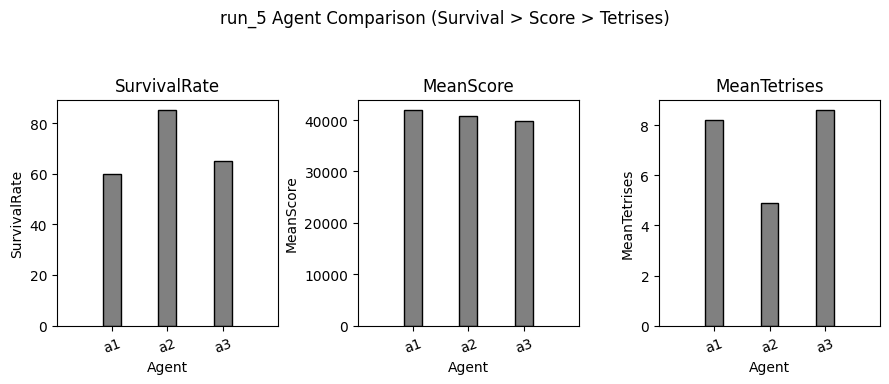

,Agent,MeanScore,MedianScore,StdScore,MeanTetrises,MaxTetrises,GamesFullSurvival,SurvivalRate,GamesUnder20k,LowestScore,HighestScore
0,a2,40743.0,46620.0,13408.183322,4.9,10,17,85.0,2,7100,52380
1,a3,39849.0,50670.0,18939.231880,8.6,17,13,65.0,4,3880,63340
2,a1,41893.0,45070.0,15101.096893,8.2,17,12,60.0,3,9580,64380


In [60]:
analyze_agents(5)


Best Agent (by Survival Rate, then Score, then Tetrises):
Agent                          a3
MeanScore                 40175.0
MedianScore               44150.0
StdScore             22403.127484
MeanTetrises                 11.8
MaxTetrises                    23
GamesFullSurvival               7
SurvivalRate                 35.0
GamesUnder20k                   6
LowestScore                  3720
HighestScore                70300
Name: 0, dtype: object 

Agent Rankings (by Survival Rate, Score, Tetrises):
  Agent  SurvivalRate  MeanScore  MeanTetrises
0    a3          35.0    40175.0         11.80
1    a1          35.0    38477.0         10.55
2    a2          15.0    40769.0         11.80


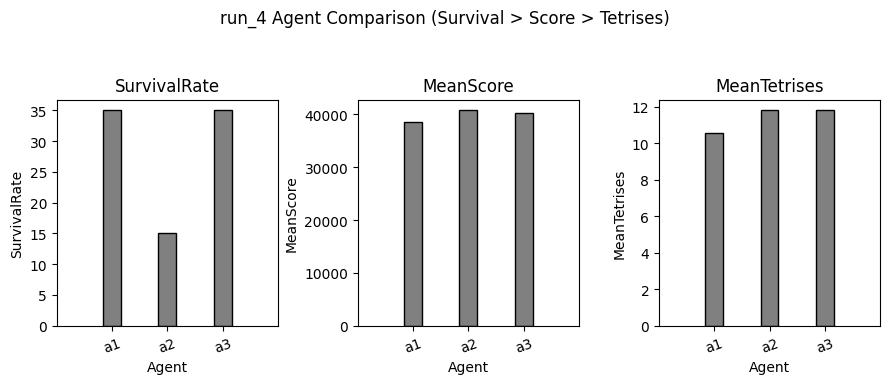

,Agent,MeanScore,MedianScore,StdScore,MeanTetrises,MaxTetrises,GamesFullSurvival,SurvivalRate,GamesUnder20k,LowestScore,HighestScore
0,a3,40175.0,44150.0,22403.127484,11.80,23,7,35.0,6,3720,70300
1,a1,38477.0,37930.0,23167.917268,10.55,26,7,35.0,6,6260,73420
2,a2,40769.0,46560.0,20912.379084,11.80,23,3,15.0,4,6920,67420


In [61]:
analyze_agents(4)

Best Agent (by Survival Rate, then Score, then Tetrises):
Agent                          a3
MeanScore                 48557.0
MedianScore               53730.0
StdScore             13086.665411
MeanTetrises                 10.0
MaxTetrises                    18
GamesFullSurvival              14
SurvivalRate                 70.0
GamesUnder20k                   1
LowestScore                 10720
HighestScore                64640
Name: 0, dtype: object 

Agent Rankings (by Survival Rate, Score, Tetrises):
  Agent  SurvivalRate  MeanScore  MeanTetrises
0    a3          70.0    48557.0         10.00
1    a2          60.0    43547.0         10.55
2    a1          50.0    45006.0         11.15


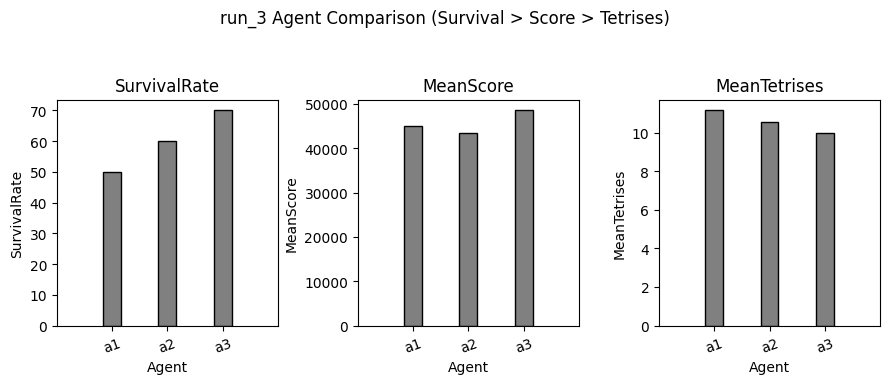

,Agent,MeanScore,MedianScore,StdScore,MeanTetrises,MaxTetrises,GamesFullSurvival,SurvivalRate,GamesUnder20k,LowestScore,HighestScore
0,a3,48557.0,53730.0,13086.665411,10.00,18,14,70.0,1,10720,64640
1,a2,43547.0,51960.0,17449.493161,10.55,21,12,60.0,3,6700,66000
2,a1,45006.0,53480.0,18204.234441,11.15,21,10,50.0,4,9860,65120


In [62]:
analyze_agents(3)

Best Agent (by Survival Rate, then Score, then Tetrises):
Agent                          a1
MeanScore                 35624.0
MedianScore               40740.0
StdScore             18281.823703
MeanTetrises                 7.45
MaxTetrises                    14
GamesFullSurvival               5
SurvivalRate                 25.0
GamesUnder20k                   5
LowestScore                  5300
HighestScore                57020
Name: 0, dtype: object 

Agent Rankings (by Survival Rate, Score, Tetrises):
  Agent  SurvivalRate  MeanScore  MeanTetrises
0    a1          25.0    35624.0          7.45
1    a2           5.0    20545.0          7.25
2    a3           0.0    17437.0          6.15


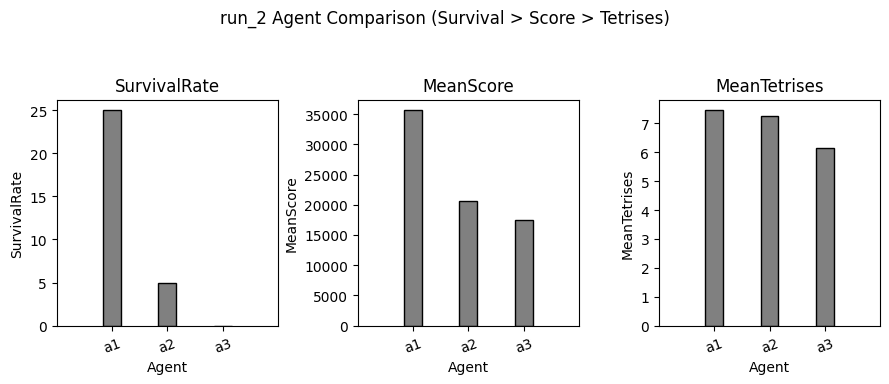

,Agent,MeanScore,MedianScore,StdScore,MeanTetrises,MaxTetrises,GamesFullSurvival,SurvivalRate,GamesUnder20k,LowestScore,HighestScore
0,a1,35624.0,40740.0,18281.823703,7.45,14,5,25.0,5,5300,57020
1,a2,20545.0,15550.0,19047.121484,7.25,27,1,5.0,13,1880,66220
2,a3,17437.0,14960.0,12735.165198,6.15,18,0,0.0,13,40,44100


In [63]:
analyze_agents(2)

Best Agent (by Survival Rate, then Score, then Tetrises):
Agent                         a1
MeanScore                42317.0
MedianScore              44490.0
StdScore             7420.073131
MeanTetrises                 3.1
MaxTetrises                    7
GamesFullSurvival             17
SurvivalRate                85.0
GamesUnder20k                  1
LowestScore                17000
HighestScore               49820
Name: 0, dtype: object 

Agent Rankings (by Survival Rate, Score, Tetrises):
  Agent  SurvivalRate  MeanScore  MeanTetrises
0    a1          85.0    42317.0          3.10
1    a3          70.0    43108.0          8.75
2    a2           0.0    20174.0          5.05


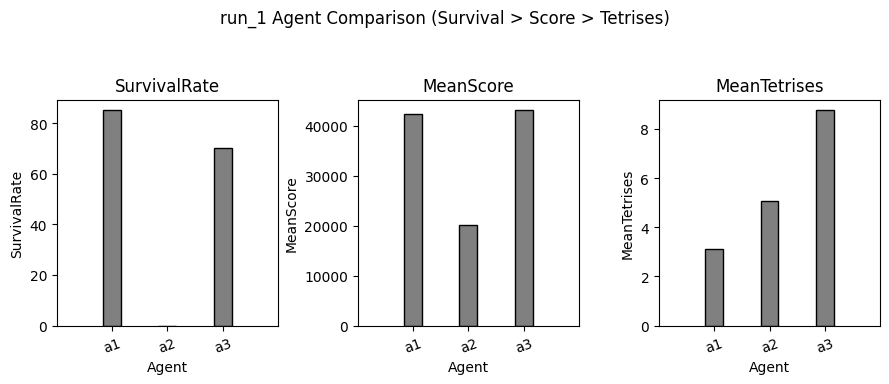

,Agent,MeanScore,MedianScore,StdScore,MeanTetrises,MaxTetrises,GamesFullSurvival,SurvivalRate,GamesUnder20k,LowestScore,HighestScore
0,a1,42317.0,44490.0,7420.073131,3.10,7,17,85.0,1,17000,49820
1,a3,43108.0,53390.0,20790.823279,8.75,16,14,70.0,4,2400,61180
2,a2,20174.0,18770.0,15001.949487,5.05,16,0,0.0,11,740,45200


In [64]:
analyze_agents(1)

Best Agent (by Survival Rate, then Score, then Tetrises):
Agent                        t1a3
MeanScore                 43017.0
MedianScore               47960.0
StdScore             13461.596488
MeanTetrises                  6.1
MaxTetrises                    12
GamesFullSurvival              16
SurvivalRate                 80.0
GamesUnder20k                   3
LowestScore                  7540
HighestScore                53440
Name: 0, dtype: object 

Agent Rankings (by Survival Rate, Score, Tetrises):
  Agent  SurvivalRate  MeanScore  MeanTetrises
0  t1a3          80.0    43017.0          6.10
1  t1a2          80.0    40891.0          3.95
2  t1a1          45.0    36809.0          5.00


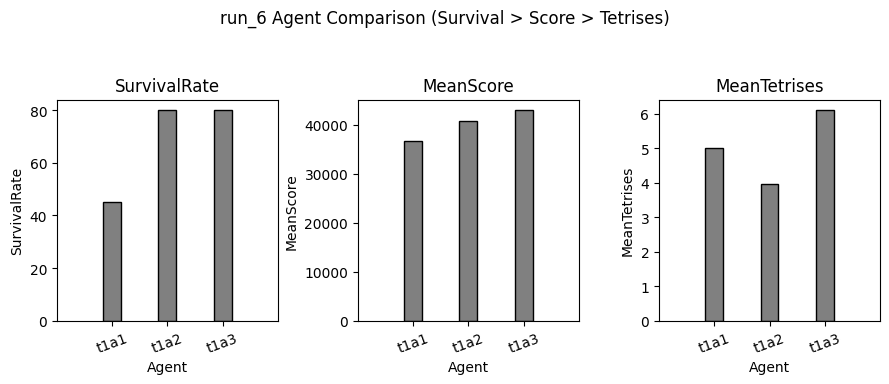

,Agent,MeanScore,MedianScore,StdScore,MeanTetrises,MaxTetrises,GamesFullSurvival,SurvivalRate,GamesUnder20k,LowestScore,HighestScore
0,t1a3,43017.0,47960.0,13461.596488,6.10,12,16,80.0,3,7540,53440
1,t1a2,40891.0,46450.0,14284.192920,3.95,9,16,80.0,3,8200,53820
2,t1a1,36809.0,40660.0,14335.693363,5.00,13,9,45.0,4,8560,52900


In [65]:
analyze_agents(6)

Best Agent (by Survival Rate, then Score, then Tetrises):
Agent                       r1a1
MeanScore                43766.0
MedianScore              43230.0
StdScore             2197.425288
MeanTetrises                 2.6
MaxTetrises                    6
GamesFullSurvival             20
SurvivalRate               100.0
GamesUnder20k                  0
LowestScore                40300
HighestScore               48720
Name: 0, dtype: object 

Agent Rankings (by Survival Rate, Score, Tetrises):
  Agent  SurvivalRate  MeanScore  MeanTetrises
0  r1a1         100.0    43766.0          2.60
1  t1a3          90.0    46598.0          7.30
2    m1          85.0    55452.0         14.85


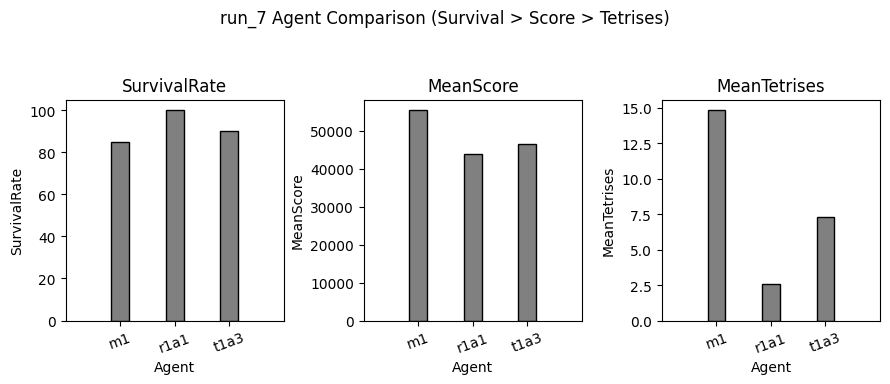

,Agent,MeanScore,MedianScore,StdScore,MeanTetrises,MaxTetrises,GamesFullSurvival,SurvivalRate,GamesUnder20k,LowestScore,HighestScore
0,r1a1,43766.0,43230.0,2197.425288,2.60,6,20,100.0,0,40300,48720
1,t1a3,46598.0,49430.0,9382.680349,7.30,11,18,90.0,1,9080,52040
2,m1,55452.0,60770.0,16696.009482,14.85,23,17,85.0,1,7680,70500


In [66]:
analyze_agents(7)